<main style="font-family: TeX Gyre Termes; font-size: 1.2rem">

### MEX #4 - Geyzson Kristoffer
SN:2023-21036

https://uvle.upd.edu.ph/mod/assign/view.php?id=542086

<hr>

question about can you use this to cluster related words or something

In [1]:
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


# Problem a

In [34]:
X, y = load_digits(return_X_y=True)
target_names = load_digits().target_names

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)
var_digits = pca.explained_variance_ratio_
cpv = np.cumsum(var_digits)*100
print(f"Explained variance ratio:\t {var_digits}")
print(f"Cumulative percent variance:\t {cpv}")

Explained variance ratio:	 [0.14890594 0.13618771]
Cumulative percent variance:	 [14.89059358 28.50936482]


### Problem a: What is the CPV at 2 PCs?
The Cumulative percent variance at 2 Principal Components is 28.51%

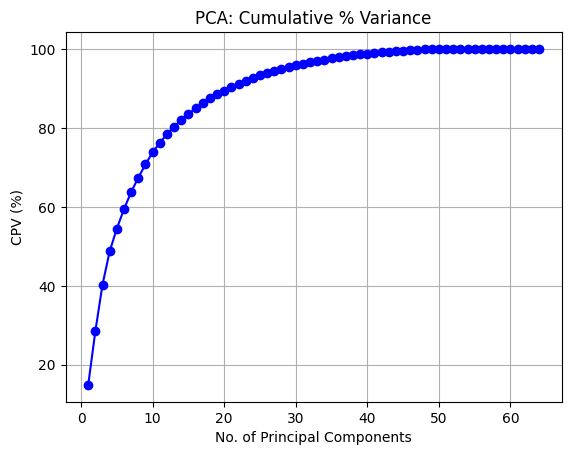

In [20]:
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X, y)
var_digits_full = pca_full.explained_variance_ratio_
cpv_full = np.cumsum(var_digits_full)*100
plt.plot(np.arange(cpv_full.size)+1,cpv_full,'bo-')
plt.title('PCA: Cumulative % Variance')
plt.xlabel('No. of Principal Components')
plt.ylabel('CPV (%)')
plt.grid()
plt.show()

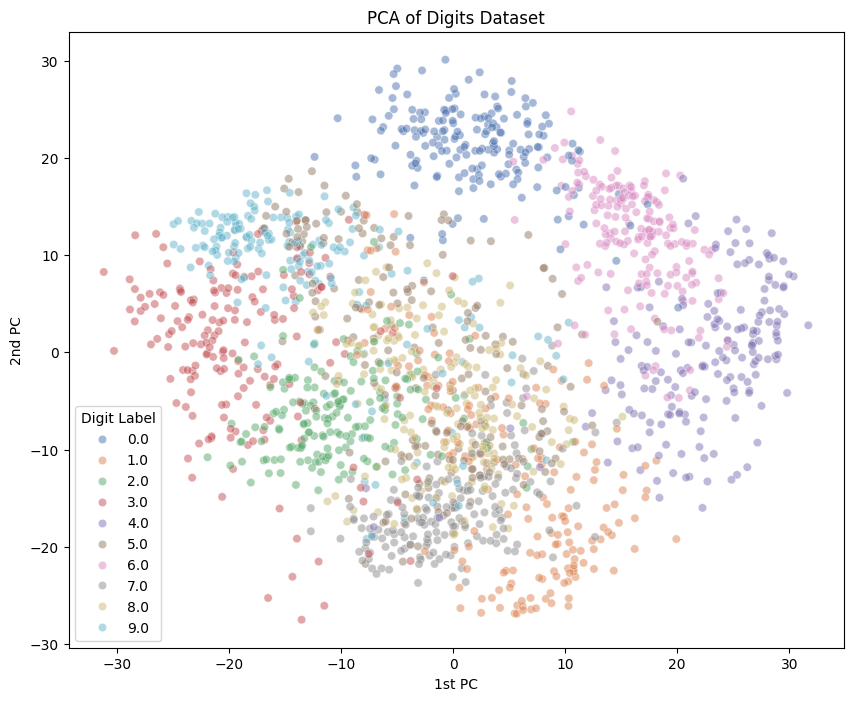

In [25]:
df_digits = pd.DataFrame(data=np.c_[X_pca, y], 
                         columns=['1st PC', '2nd PC', 'Digit Label'])

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_digits, x="1st PC", y="2nd PC", hue="Digit Label", palette="deep", alpha=0.5)
plt.title('PCA of Digits Dataset')
plt.show()

# Problem b

Best parameters: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best cross-validation accuracy: 0.6770157465376588
Training Classification Accuracy: 0.6889419252187748
Testing Classification Accuracy: 0.6333333333333333


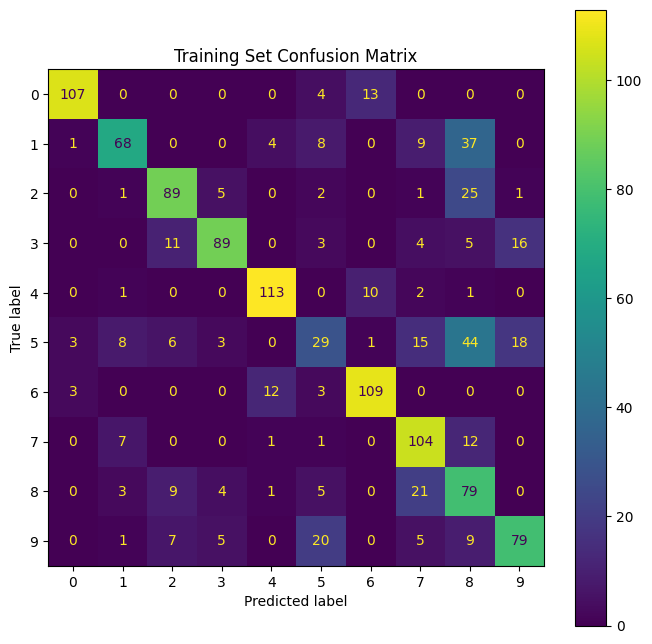

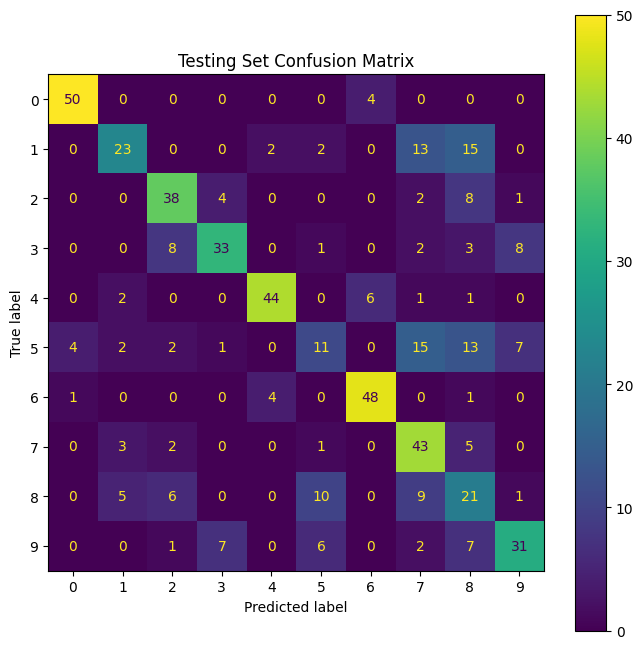

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, stratify=y, random_state=0
)

param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': ['scale', 'auto'], 
    'svc__kernel': ['linear', 'rbf', 'poly']
}

# param_grid = {
#     'svc__C': [0.1, 1, 10, 50, 100, 500, 1000],
#     'svc__gamma': [1e-3, 1e-2, 'scale', 'auto', 0.1, 0.5, 1],  
#     'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 
#     'svc__degree': [2, 3, 4],  
#     'svc__class_weight': [None, 'balanced']  
# }

model = make_pipeline(StandardScaler(), SVC())
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score}")

best_svm = grid_search.best_estimator_

y_train_pred = best_svm.predict(X_train)
train_accuracy = best_svm.score(X_train, y_train)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)

y_test_pred = best_svm.predict(X_test)
test_accuracy = best_svm.score(X_test, y_test)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(figsize=(8, 8)) 
disp = ConfusionMatrixDisplay(confusion_matrix=train_conf_matrix, display_labels=target_names)
disp.plot(ax=ax)
ax.set_title('Training Set Confusion Matrix') 
print(f"Training Classification Accuracy: {train_accuracy}")

fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=test_conf_matrix, display_labels=target_names)
disp.plot(ax=ax)
ax.set_title('Testing Set Confusion Matrix')
print(f"Testing Classification Accuracy: {test_accuracy}")

# Problem c

In [ ]:


# Split the data into 70% Training and 30% Testing with stratification, using random_state=0
X_train, X_test, y_train, y_test = train_test_split(
    X_pca_digits, y_digits, test_size=0.3, stratify=y_digits, random_state=0
)

# Setup parameter grid for SVM hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'kernel': ['linear', 'rbf', 'poly']  # Specifies the kernel type to be used in the algorithm
}

# Initialize GridSearchCV with SVM and the parameter grid
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score}")

# Train an SVM with the best tuned model
best_svm = grid_search.best_estimator_

# Evaluate on the training set
y_train_pred = best_svm.predict(X_train)
train_accuracy = best_svm.score(X_train, y_train)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)

# Evaluate on the testing set
y_test_pred = best_svm.predict(X_test)
test_accuracy = best_svm.score(X_test, y_test)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)


# Report the classification accuracy and confusion matrix for both the Training and Test sets

# Plot the confusion matrix for the training set
disp = ConfusionMatrixDisplay(confusion_matrix=train_conf_matrix, display_labels=digits.target_names)
disp.plot()
print(f"Training Classification Accuracy: {train_accuracy}")


# Plot the confusion matrix for the testing set
disp = ConfusionMatrixDisplay(confusion_matrix=test_conf_matrix, display_labels=digits.target_names)
disp.plot()
print(f"Testing Classification Accuracy: {test_accuracy}")




Explained variance ratio:    [0.12033916 0.09561054]
Cumulative percent variance: [12.0339161  21.59497049]


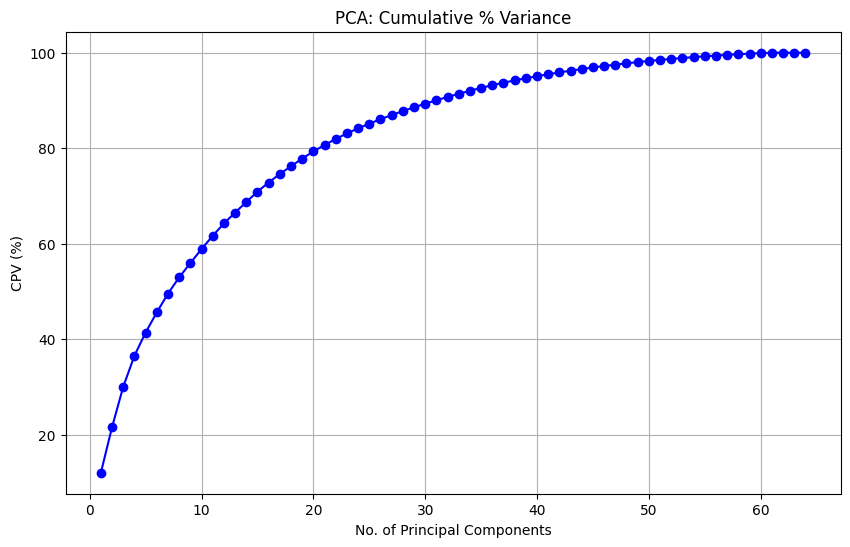

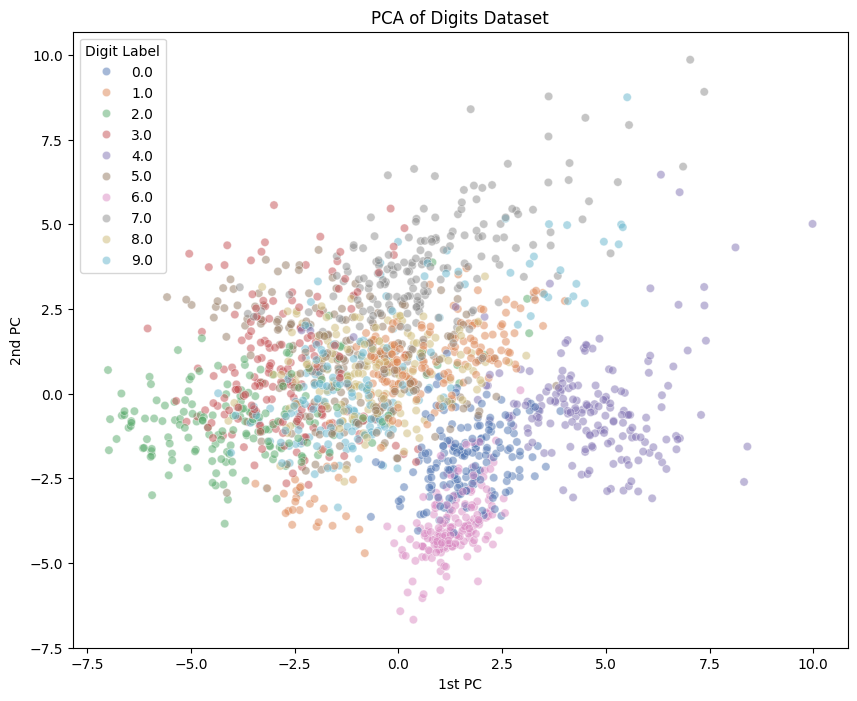

In [2]:
# Load the digits dataset
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

# Create a pipeline for standard scaling and PCA
pipeline = make_pipeline(StandardScaler(), PCA(n_components=2))
X_pca_digits = pipeline.fit_transform(X_digits)

# Explained variance ratio
var_digits = pipeline.named_steps['pca'].explained_variance_ratio_
print("Explained variance ratio:    %s" % str(var_digits))
print("Cumulative percent variance: %s" % str(np.cumsum(var_digits)*100))


# Performing PCA without limiting the number of components
pipeline_full = make_pipeline(StandardScaler(), PCA())
pipeline_full.fit(X_digits)

# Get the explained variance ratio for all components
var_full_digits = pipeline_full.named_steps['pca'].explained_variance_ratio_
cpv_full = np.cumsum(var_full_digits) * 100

# Plot the CPV for all principal components
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(cpv_full)) + 1, cpv_full, 'bo-')  # +1 to align number of components with plot indexing
plt.title('PCA: Cumulative % Variance')
plt.xlabel('No. of Principal Components')
plt.ylabel('CPV (%)')
plt.grid()
plt.show()


# Create a DataFrame for plotting
df_digits = pd.DataFrame(data=np.c_[X_pca_digits, y_digits], 
                         columns=['1st PC', '2nd PC', 'Digit Label'])

# Plot the first 2 principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_digits, x="1st PC", y="2nd PC", hue="Digit Label", palette="deep", alpha=0.5)
plt.title('PCA of Digits Dataset')
plt.show()


Best parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation accuracy: 0.5767975716182887
Training Classification Accuracy: 0.6165473349244233
Testing Classification Accuracy: 0.5777777777777777


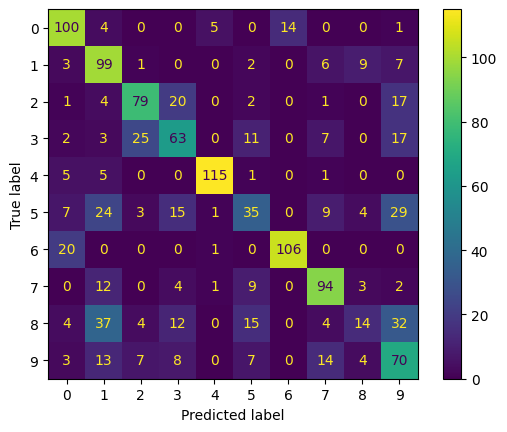

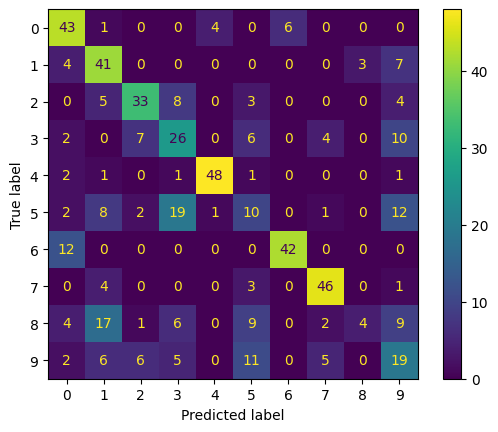

In [3]:


# Split the data into 70% Training and 30% Testing with stratification, using random_state=0
X_train, X_test, y_train, y_test = train_test_split(
    X_pca_digits, y_digits, test_size=0.3, stratify=y_digits, random_state=0
)

# Setup parameter grid for SVM hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'kernel': ['linear', 'rbf', 'poly']  # Specifies the kernel type to be used in the algorithm
}

# Initialize GridSearchCV with SVM and the parameter grid
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score}")

# Train an SVM with the best tuned model
best_svm = grid_search.best_estimator_

# Evaluate on the training set
y_train_pred = best_svm.predict(X_train)
train_accuracy = best_svm.score(X_train, y_train)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)

# Evaluate on the testing set
y_test_pred = best_svm.predict(X_test)
test_accuracy = best_svm.score(X_test, y_test)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)


# Report the classification accuracy and confusion matrix for both the Training and Test sets

# Plot the confusion matrix for the training set
disp = ConfusionMatrixDisplay(confusion_matrix=train_conf_matrix, display_labels=digits.target_names)
disp.plot()
print(f"Training Classification Accuracy: {train_accuracy}")


# Plot the confusion matrix for the testing set
disp = ConfusionMatrixDisplay(confusion_matrix=test_conf_matrix, display_labels=digits.target_names)
disp.plot()
print(f"Testing Classification Accuracy: {test_accuracy}")




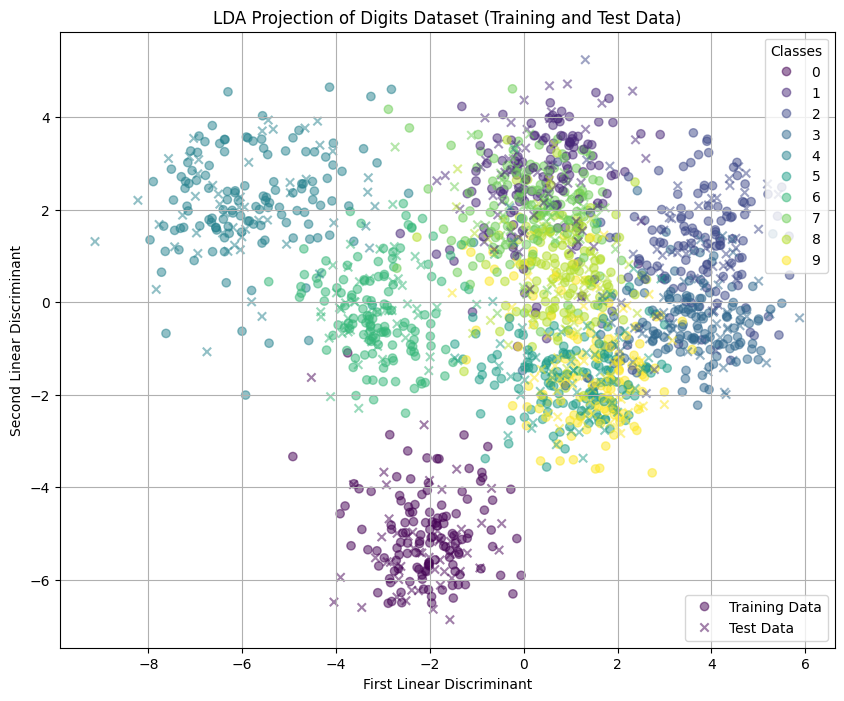

In [4]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
import numpy as np

# Load the digits dataset
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

# Perform LDA with 2 components on the original data
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_digits, y_digits)

# Split the LDA-transformed data into training and testing sets
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(
    X_lda, y_digits, test_size=0.3, stratify=y_digits, random_state=0
)

# Plotting both training and testing data on the same chart with legends for class labels
plt.figure(figsize=(10, 8))

# Scatter plot for training data with label
scatter1 = plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train_lda, 
                       cmap='viridis', alpha=0.5, marker='o', label='Training Data')

# Scatter plot for testing data with label
scatter2 = plt.scatter(X_test_lda[:, 0], X_test_lda[:, 1], c=y_test_lda, 
                       cmap='viridis', alpha=0.5, marker='x', label='Test Data')

# Create a legend for the class labels
legend1 = plt.legend(*scatter1.legend_elements(), loc="upper right", title="Classes")
plt.gca().add_artist(legend1)

# Create a separate legend for the training/test labels
plt.legend(handles=[scatter1.legend_elements()[0][0], scatter2.legend_elements()[0][0]], 
           labels=['Training Data', 'Test Data'], loc="lower right")

plt.title('LDA Projection of Digits Dataset (Training and Test Data)')
plt.xlabel('First Linear Discriminant')
plt.ylabel('Second Linear Discriminant')
plt.grid(True)
plt.show()


In [5]:
X_pca_digits[0:10]

array([[ 1.91421456, -0.95449878],
       [ 0.58897892,  0.92465872],
       [ 1.30203776, -0.31700349],
       [-3.02076899, -0.86884461],
       [ 4.52895103, -1.09350034],
       [-1.30189442, -1.14836166],
       [ 1.43422444, -2.95781292],
       [ 0.61423777,  5.46221762],
       [-1.09844591, -0.66582425],
       [-0.53797513, -0.777583  ]])